In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

dataset_path = '/content/drive/MyDrive/Tumour'
print("Categories:", os.listdir(dataset_path))

Categories: ['test', 'README.dataset.txt', 'train', 'valid']


In [5]:
categories = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]
print("Tumor Categories:", categories)

Tumor Categories: ['test', 'train', 'valid']


In [6]:
import numpy as np
import cv2
import os

img_size = 224
data = []
valid_extensions = ('.jpg', '.jpeg', '.png')
max_images_per_class = 1000

for label, category in enumerate(categories):
    cat_path = os.path.join(dataset_path, category)
    count = 0

    for root, dirs, files in os.walk(cat_path):
        for file in files:
            if not file.lower().endswith(valid_extensions):
                continue

            img_path = os.path.join(root, file)
            img = cv2.imread(img_path)
            if img is None:
                continue

            try:
                img = cv2.resize(img, (img_size, img_size))
                img = img / 255.0
                data.append([img, label])
                count += 1
                if count >= max_images_per_class:
                    break
            except:
                continue
        if count >= max_images_per_class:
            break

print("Total images loaded:", len(data))

X = np.array([i[0] for i in data])
y = np.array([i[1] for i in data])
print("X shape:", X.shape)
print("y shape:", y.shape)

Total images loaded: 1748
X shape: (1748, 224, 224, 3)
y shape: (1748,)


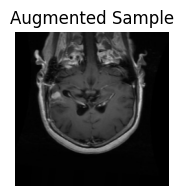

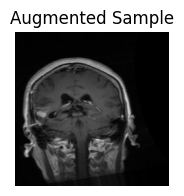

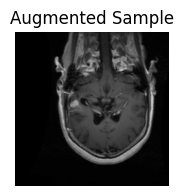

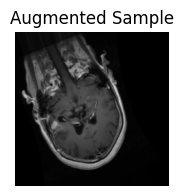

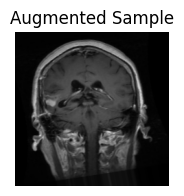

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

# Fit generator to data (if needed)
datagen.fit(X)

# Show a few augmented examples
i = 0
for batch in datagen.flow(X[:1], batch_size=1):
    plt.figure(figsize=(2, 2))
    plt.imshow(batch[0])
    plt.axis('off')
    plt.title("Augmented Sample")
    i += 1
    if i == 5:
        break

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# CNN model
model = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,170,372 (42.61 MB)

 Trainable params: 11,169,924 (42.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Load the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze base model initially
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(4, activation='softmax')(x)  # Adjust 4 to number of tumor classes

model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [14]:
# Unfreeze last few layers of the base model
base_model.trainable = True

# freeze all layers except last N
for layer in base_model.layers[:-30]:
    layer.trainable = False

# Re-compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [16]:
from tensorflow.keras.applications import InceptionV3
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [17]:
from tensorflow.keras.applications import EfficientNetB0
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Epoch 1/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 331s 6s/step - accuracy: 0.4658 - loss: 2.0794 - val_accuracy: 0.3207 - val_loss: 5.4919
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 329s 6s/step - accuracy: 0.6018 - loss: 1.0226 - val_accuracy: 0.3207 - val_loss: 10.7976
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 397s 6s/step - accuracy: 0.5857 - loss: 1.0190 - val_accuracy: 0.3207 - val_loss: 11.4845
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 321s 6s/step - accuracy: 0.6130 - loss: 0.9949 - val_accuracy: 0.3227 - val_loss: 7.4848


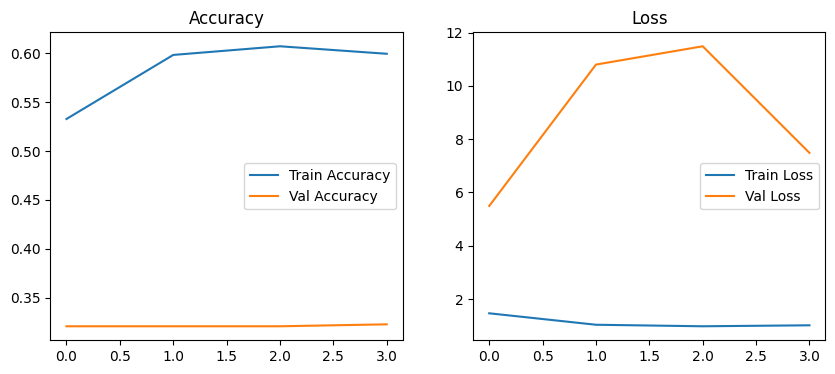

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Paths
train_dir = "/content/drive/MyDrive/Tumour/train"
val_dir = "/content/drive/MyDrive/Tumour/valid"

# Image parameters
image_size = (224, 224)
batch_size = 32

# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Model Definition
def build_custom_cnn(input_shape=(224, 224, 3), num_classes=3):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Build and Compile Model
num_classes = len(train_generator.class_indices)
cnn_model = build_custom_cnn(num_classes=num_classes)
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint('cnn_best_model.keras', save_best_only=True, monitor='val_loss')
]

# Training
cnn_history = cnn_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

# Plot Accuracy and Loss
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.32      1.00      0.49       161
  meningioma       0.00      0.00      0.00       124
    no_tumor       0.00      0.00      0.00        99
   pituitary       0.00      0.00      0.00       118

    accuracy                           0.32       502
   macro avg       0.08      0.25      0.12       502
weighted avg       0.10      0.32      0.16       502



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


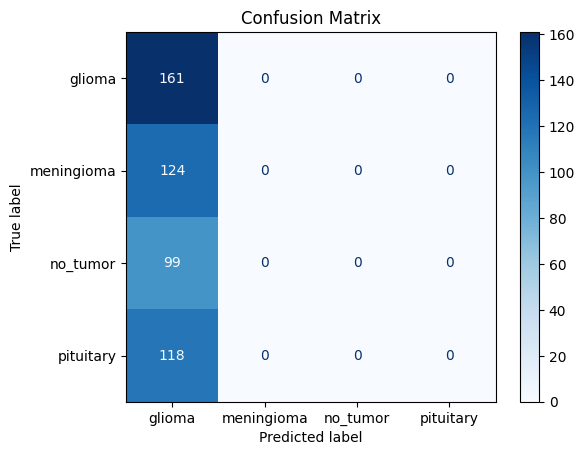

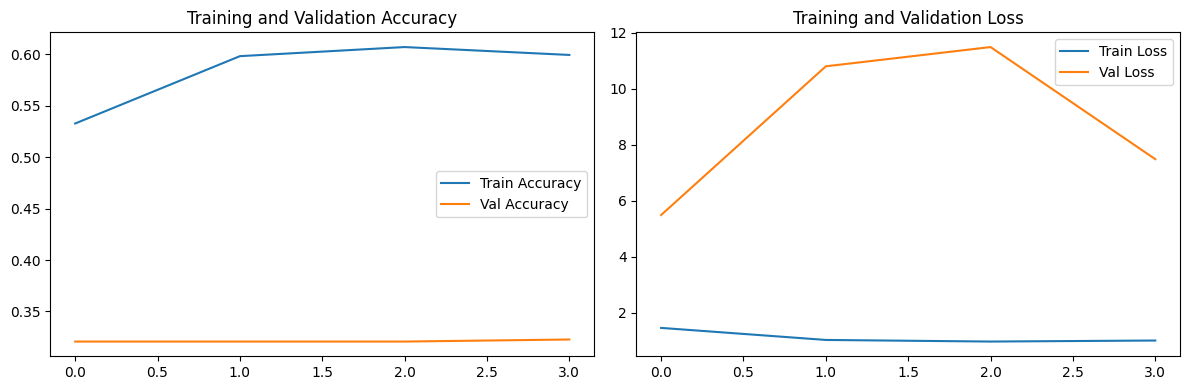

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# 1. Predict on validation set
val_preds = cnn_model.predict(val_generator)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_generator.classes
class_names = list(val_generator.class_indices.keys())

# 2. Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# 3. Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 4. Plot training history
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 4))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 5. Call the plotting function
plot_history(cnn_history)


In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Set number of classes
num_classes = len(train_generator.class_indices)

# Load base MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))

# Freeze base layers initially
base_model.trainable = False

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# Final model
pretrained_model = Model(inputs=base_model.input, outputs=output_layer)

# Compile
pretrained_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint('mobilenet_best_model.h5', save_best_only=True, monitor='val_loss')
]

pretrained_history = pretrained_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=callbacks
)

/tmp/ipython-input-24-4245010522.py:10: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(224, 224, 3)))


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1149']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3854 - loss: 1.5798

53/53 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.3875 - loss: 1.5740 - val_accuracy: 0.7191 - val_loss: 0.6842
Epoch 2/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7182 - loss: 0.7277

53/53 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.7181 - loss: 0.7273 - val_accuracy: 0.7769 - val_loss: 0.5771
Epoch 3/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7353 - loss: 0.6795

53/53 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.7356 - loss: 0.6788 - val_accuracy: 0.7948 - val_loss: 0.5287
Epoch 4/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7982 - loss: 0.5184

53/53 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.7982 - loss: 0.5187 - val_accuracy: 0.8207 - val_loss: 0.4770
Epoch 5/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.7829 - loss: 0.5478 - val_accuracy: 0.8088 - val_loss: 0.5039
Epoch 6/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.8126 - loss: 0.4980 - val_accuracy: 0.7849 - val_loss: 0.5483
Epoch 7/10
53/53 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8121 - loss: 0.4991 - val_accuracy: 0.8187 - val_loss: 0.4825


In [25]:
cnn_eval = cnn_model.evaluate(val_generator, verbose=0)
pretrained_eval = pretrained_model.evaluate(val_generator, verbose=0)

Custom CNN Performance:
  - Loss: 5.4919
  - Accuracy: 32.07%

Pretrained Model Performance:
  - Loss: 0.4770
  - Accuracy: 82.07%


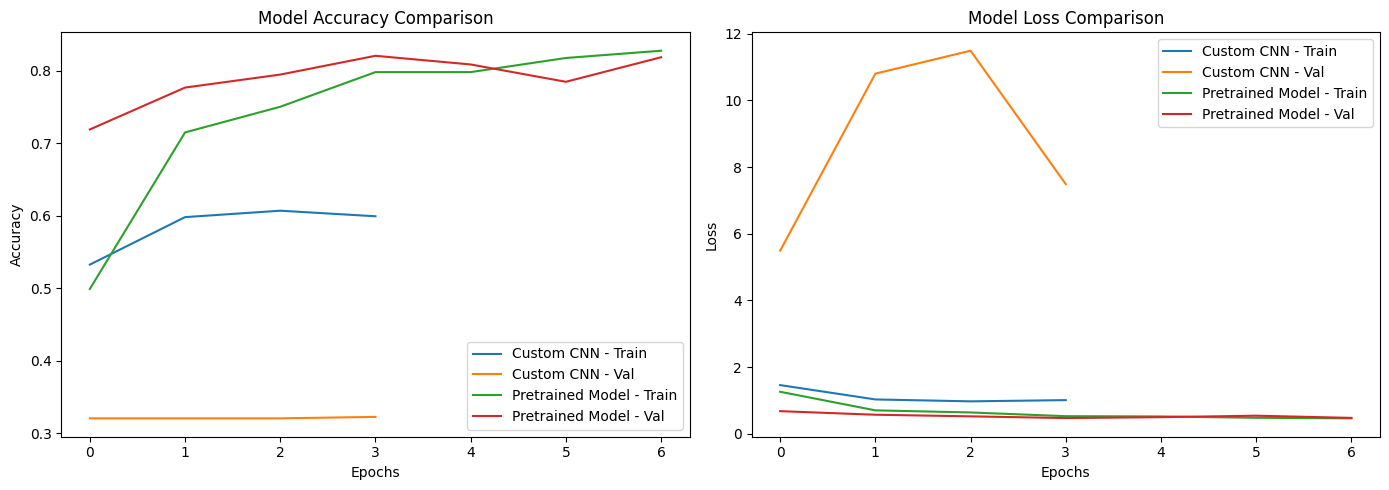

In [26]:
# 1. Evaluate both models on the same validation generator
cnn_eval = cnn_model.evaluate(val_generator, verbose=0)
pretrained_eval = pretrained_model.evaluate(val_generator, verbose=0)

print("Custom CNN Performance:")
print(f"  - Loss: {cnn_eval[0]:.4f}")
print(f"  - Accuracy: {cnn_eval[1]*100:.2f}%\n")

print("Pretrained Model Performance:")
print(f"  - Loss: {pretrained_eval[0]:.4f}")
print(f"  - Accuracy: {pretrained_eval[1]*100:.2f}%")

# 2. Plot Training History Comparison
def compare_histories(h1, h2, label1='Custom CNN', label2='Pretrained Model'):
    acc1 = h1.history['accuracy']
    val_acc1 = h1.history['val_accuracy']
    acc2 = h2.history['accuracy']
    val_acc2 = h2.history['val_accuracy']

    epochs_range = range(max(len(acc1), len(acc2)))

    plt.figure(figsize=(14, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(acc1, label=f'{label1} - Train')
    plt.plot(val_acc1, label=f'{label1} - Val')
    plt.plot(acc2, label=f'{label2} - Train')
    plt.plot(val_acc2, label=f'{label2} - Val')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    loss1 = h1.history['loss']
    val_loss1 = h1.history['val_loss']
    loss2 = h2.history['loss']
    val_loss2 = h2.history['val_loss']

    plt.subplot(1, 2, 2)
    plt.plot(loss1, label=f'{label1} - Train')
    plt.plot(val_loss1, label=f'{label1} - Val')
    plt.plot(loss2, label=f'{label2} - Train')
    plt.plot(val_loss2, label=f'{label2} - Val')
    plt.title('Model Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 3. Call the comparison function
compare_histories(cnn_history, pretrained_history)
